In [427]:
import numpy as np
import pandas as pd

# Import test and train data
path = '/Users/mjohnson/Desktop/Kaggle Problem/train.csv'

trainData = pd.read_csv(path, names=['ID', 'Text', 'Toxic','Severe_Toxic','Obscene', 'Threat', 'Insult', 'Identity_Hate'], low_memory = False, header=0)

In [428]:
# Randomize training data
trainData = trainData.sample(frac=1).reset_index(drop=True)

# Assign text to X and categories to y
X = trainData.Text
y = [trainData.Toxic, trainData.Severe_Toxic, trainData.Obscene, trainData.Threat, trainData.Insult, trainData.Identity_Hate]

In [429]:
n = int(0.8 * len(X))
X_train = trainData.Text[:n]
X_test = trainData.Text[n:]

y_train = [trainData.Toxic[:n], trainData.Severe_Toxic[:n], trainData.Obscene[:n], trainData.Threat[:n], trainData.Insult[:n], trainData.Identity_Hate[:n]]
y_test = [trainData.Toxic[n:], trainData.Severe_Toxic[n:], trainData.Obscene[n:], trainData.Threat[n:], trainData.Insult[n:], trainData.Identity_Hate[n:]]

In [430]:
from sklearn.feature_extraction.text import CountVectorizer

# Transform traing data
count_vect = CountVectorizer(stop_words='english', min_df=.0002)
X_train = count_vect.fit_transform(X_train)

# Transform testing data
X_test = count_vect.transform(X_test)

In [431]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Parameters: 
#     model - (str) The model you would like to train the categories on. 
#     y - (int) The category you would like to test (0-5)
# Returns:
#     mod - (Object) This function returns the instatiated model that was specified in the parameter 'model'

def chooseModel(model,y):
    if model == "nb":
        # use MultinomialNB
        mod = MultinomialNB()
        return mod
    elif model == "sgd":
        # use SGDClassifier 
        mod = SGDClassifier(loss='log')
        print(elapsed_time)
        return mod
    elif model == "randTree":
        # Use RandomForestClassifier
        mod = RandomForestClassifier(n_estimators=10)
        print(elapsed_time)
        return mod
    elif model == "decTree":
        # Use DecisionTreeClassifier
        mod = DecisionTreeClassifier()
        print(elapsed_time)
        return mod
    elif model == "svm":
        mod = SVC()
        print(elapsed_time)
        return mod
    else:
        print("Sorry! We have not implemented that model yet.")

In [432]:
def checkAllCategories(modelToUse):
    # Identity_Hate
    mlb = chooseModel(model=modelToUse,y=5).fit(X_train, y_train[5])
    predicted_Identity_Hate = mlb.predict_proba(X_test)
    predicted_Identity_Hate = pd.Series(predicted_Identity_Hate[:,1])

    # Insult
    mlb = chooseModel(model=modelToUse,y=4).fit(X_train, y_train[4])
    predicted_Insult = mlb.predict_proba(X_test)
    predicted_Insult = pd.Series(predicted_Insult[:,1])

    # Threat
    mlb = chooseModel(model=modelToUse,y=3).fit(X_train, y_train[3])
    predicted_Threat = mlb.predict_proba(X_test)
    predicted_Threat = pd.Series(predicted_Threat[:,1])

    # Obscene
    mlb = chooseModel(model=modelToUse,y=2).fit(X_train, y_train[2])
    predicted_Obscene = mlb.predict_proba(X_test)
    predicted_Obscene = pd.Series(predicted_Obscene[:,1])

    # Severly Toxic
    mlb = chooseModel(model=modelToUse,y=1).fit(X_train, y_train[1])
    predicted_Severly_Toxic = mlb.predict_proba(X_test)
    predicted_Severly_Toxic = pd.Series(predicted_Severly_Toxic[:,1])

    # Toxic
    mlb = chooseModel(model=modelToUse,y=0).fit(X_train, y_train[0])
    predicted_Toxic = mlb.predict_proba(X_test)
    predicted_Toxic = pd.Series(predicted_Toxic[:,1])

    data = pd.concat([predicted_Toxic,predicted_Severly_Toxic,predicted_Obscene,predicted_Threat,predicted_Insult,predicted_Identity_Hate], axis=1)
    return data

# Create list of column names (How Kaggle wants it)
columnNames = 'id','toxic','severe_toxic','obscene', 'threat', 'insult', 'identity_hate'

# Concat the pandas series together to create a data frame
data = checkAllCategories(modelToUse="nb")

In [433]:
# ROC for each label
from sklearn import metrics

fpr0, tpr0, thresholds0 = metrics.roc_curve(y_test[0], data[0])
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test[1], data[1])
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test[2], data[2])
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test[3], data[3])
fpr4, tpr4, thresholds4 = metrics.roc_curve(y_test[4], data[4])
fpr5, tpr5, thresholds5 = metrics.roc_curve(y_test[5], data[5])

# Create a list for fpr and tpr
fpr = [fpr0,fpr1,fpr2,fpr3,fpr4,fpr5]
tpr = [tpr0,tpr1,tpr2,tpr3,tpr4,tpr5]

# Calculate each label's auc and store the values in a list
auc = []
[auc.append(metrics.roc_auc_score(y_test[i], data[i])) for i in range(len(fpr))]

'''
# Calculate average fpr, and tpr values for each label
fpr0_average = 0

fpr0_average = [fpr0_average += fpr0[i] for i in range(len(fpr0))] / len(fpr0)
fpr1_average = [fpr1_average += fpr1[i] for i in range(len(fpr1))] / len(fpr0)
fpr2_average = [fpr2_average += fpr2[i] for i in range(len(fpr2))]
fpr3_average = [fpr3_average += fpr3[i] for i in range(len(fpr3))]
fpr4_average = [fpr4_average += fpr4[i] for i in range(len(fpr4))]
fpr5_average = [fpr5_average += fpr5[i] for i in range(len(fpr5))]
fpr_averages = [fpr0_average, fpr1_average, fpr2_average, fpr3_average, fpr4_average, fpr5_average]

tpr0_average = [tpr0_average += tpr0[i] for i in range(len(tpr0))]
tpr1_average = [tpr1_average += tpr1[i] for i in range(len(tpr1))]
tpr2_average = [tpr2_average += tpr2[i] for i in range(len(tpr2))]
tpr3_average = [tpr3_average += tpr3[i] for i in range(len(tpr3))]
tpr4_average = [tpr4_average += tpr4[i] for i in range(len(tpr4))]
tpr5_average = [tpr5_average += tpr5[i] for i in range(len(tpr5))]
tpr_averages = [tpr0_average, tpr1_average, tpr2_average, tpr3_average, tpr4_average, tpr5_average]
'''
'''
# Calculate average fpr, tpr, and auc values
fpr_average = sum(fpr) / len(fpr)
tpr_average = sum(tpr) / len(tpr)
auc_average = sum(auc) / len(auc)
'''

'\n# Calculate average fpr, tpr, and auc values\nfpr_average = sum(fpr) / len(fpr)\ntpr_average = sum(tpr) / len(tpr)\nauc_average = sum(auc) / len(auc)\n'

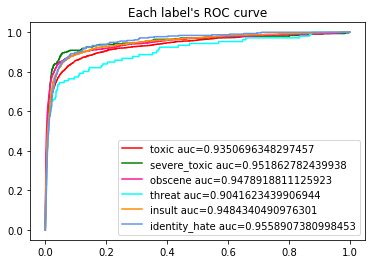

'\nplt.title("Average ROC curve")\nplt.plot(fpr_average, tpr_averagee, color=\'gold\', label=\'Average ROC\')\nplt.legend(loc=4)\nplt.show\n'

In [434]:
# Plot ROC curves with AUC values

import matplotlib.pyplot as plt

colors = ['red', 'green', 'deeppink', 'aqua', 'darkorange', 'cornflowerblue']

plt.title("Each label's ROC curve")
for i in range(len(fpr)):
    plt.plot(fpr[i], tpr[i], color=colors[i], label= str(columnNames[i+1]) + " auc=" + str(auc[i]))
    plt.legend(loc=4)
plt.show()

'''
plt.title("Average ROC curve")
plt.plot(fpr_average, tpr_averagee, color='gold', label='Average ROC')
plt.legend(loc=4)
plt.show
'''

In [ ]:
# Test parameters for CountVectorizer

# Define parameters that you want to check
t_p = ["(?u)\\b\w\w+\\b","(?u)\\b\w[a-z]+\\b","(?u)\\b\w[a-z,A-Z]+\\b"]
ngram = [(1,2),(1,1),(1,3)]
min_d = np.arange(.0001, .001, .00001) # 90
stop_w = ["english","None"]
d_e = ['strict','ignore','replace']
# Total iterations would be 3 x 3 x 90 x 2 x 3 = 4,860

# Parameters: 
#     X_train - (pandas.core.series.Series) The UNtransformed text data that you would like to countvectorizer
#     y_train - (list) A list of the predictions for each category. If only one category then just pass that one 
#               category as a list (e.g. [category])
#     X_test - (pandas.core.series.Series) The UNtransformed text data that will be transformed by each iteration of
#              the parameters for CountVectorizer and then used to predict the accuracy of those parameters
#     y_test - (list) A list of the prediction for each category. This will be used to see how accurate a set of 
#              parameters can make the model. If only one category then just pass that one category as a list (e.g. [category])
#     Token_Pattern - (list) A list of different token patterns that you want to test
#     Decode_Error - (list) A list of different options that you want to test
#     Ngram_Range - (list) A list of different tuples that specifcy the range of ngrams, such as (1,2) which would count
#                   words such as 'Data' and 'Data Scientist', that you want to test
#     Stop_Words - (list) A list of different options for stop words that you would like to test
#     Min_Df - (list) A list of different float values that you would like to test
#     model - (str) The model you would like to train the categories on.
#     y - (int) The category you would like to test (0-5)
# Returns:
#     maxValueParameters - (list) This function returns the instatiated model that was specified in the parameter 'model'
def testCountVect(X_train, y_train, X_test, y_test, Token_Pattern=[],Decode_Error=[],Ngram_Range=[],Stop_Words=[],Min_Df=[],model=MultinomialNB()):
    
    counter = 0
    start_time = time.time()
    maxValue = 0
    maxValueParameters = []
    
    # Checkwhich parameters are empty and then calculate combinations after that
    for param in itertools.product(Token_Pattern,Decode_Error,Ngram_Range,Stop_Words,Min_Df):
        # Create the CountVectorizer with the combination of parameters
        count_vect = CountVectorizer(token_pattern=param[0],decode_error=param[1],ngram_range=param[2],stop_words=param[3],min_df=param[4])
        X_train_count = count_vect.fit_transform(X_train)

        # Transform X_test
        X_test_count = count_vect.transform(X_test)

        # Train the model with the transoformed data
        model = model.fit(X_train_count,y_train)

        # Predict the X_test data with the model
        predicted = model.predict(X_test_count)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, predicted)
        results = [accuracy,param[0],param[1],param[2],param[3],param[4]]
        print(results)

        if results[0] > maxValue:
            maxValue = results[0]
            maxValueParameters.append(results[0])
            maxValueParameters.append(results[1])
            maxValueParameters.append(results[2])
            maxValueParameters.append(results[3])
            maxValueParameters.append(results[4])

        counter = counter + 1
    elapsed_time = time.time() - start_time
    print("Time: " + str(elapsed_time) + " Iterations: " + str(counter))   
    print("Thus, every iterations takes about " + str(int(elapsed_time/counter)) + " seconds.")
    print("Here are the best parameters")
    print(maxValueParameters)
        
    return maxValueParameters
                
        
# Test the function 
# testCountVect(X_train=X_train_train,y_train=y_train_train[0],X_test=X_train_test,y_test=y_train_test[0],Token_Pattern=t_p, \
            #  Decode_Error=d_e,Ngram_Range=ngram,Min_Df=min_d,Stop_Words=stop_w)